# <img style="float: left; padding-right: 10px; width: 45px"> CS109A Final Project
## Fetal Health Classification
### Rocky Aguirre and Joanna Walters


**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader <br/>
**TF**: Kimon Aristotelis Vogt

<hr style="height:2pt">

<a id="contents"></a>

## Final Project Contents

- [**Problem Statement and Questions**](#intro)


- [**Import Libraries**](#import)

- [**Exploratory Data Analysis (EDA)**](#eda)

- [**Implementing Different Models**](#models)

- [**Best Model**](#bestmodel)

- [**Final Thoughts**](#conclusion)

<a id="intro"></a>

## Problem Statement

This project aims to leverage physiological data to enhance our understanding and prediction of fetal health. By analyzing a comprehensive dataset, which categorizes various fetal health markers as "normal," "suspect," or "pathological," we will develop a robust, predictive model. This model will accurately classify fetal health status and identify key features critical for prediction. Insights gained from this research could be vital in advancing prenatal care, offering significant clinical implications. Through this project, we explore the potential of a data-driven approach to revolutionize the field of fetal health monitoring and care. 


### The Main Questions

1. How can we effectively use various physiological features to predict and classify the health status of a fetus? <br/>
    a. Can we develop a predictive model that accurately classifies fetal health?<br/>
    b. Can we determine which features are the most important to predict fetal health?<br/>
    c. What insights can be drawn from our data and model that could have clinical significance?<br/>
    d. Can we utilize the outcomes to improve prenatal care?<br/>

<a id="import"></a>
## Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="eda"></a>
## Exploratory Data Analysis (EDA) and Analysis

In [3]:
# Load the dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### General Dataset Description

Our dataset was found on Kaggle. The classifications of normal, suspect, and pathological were determined by three respected obstetricians whom we have decided to trust. We discovered that our dataset was complete, and there were no missing values. The biggest issue that we encountered was that our classifications were imbalanced. To fix this, we will use SMOTE to oversample and balance the dataset. As another step of pre-processing, we will scale the dataset so that it is easier to visualize outliers. Scaling the data also has other benefits such as improving algorithm performance and a faster convergence if we are to try gradient descent which we intend to. The steps outlined in this paragraph will be implemented below.

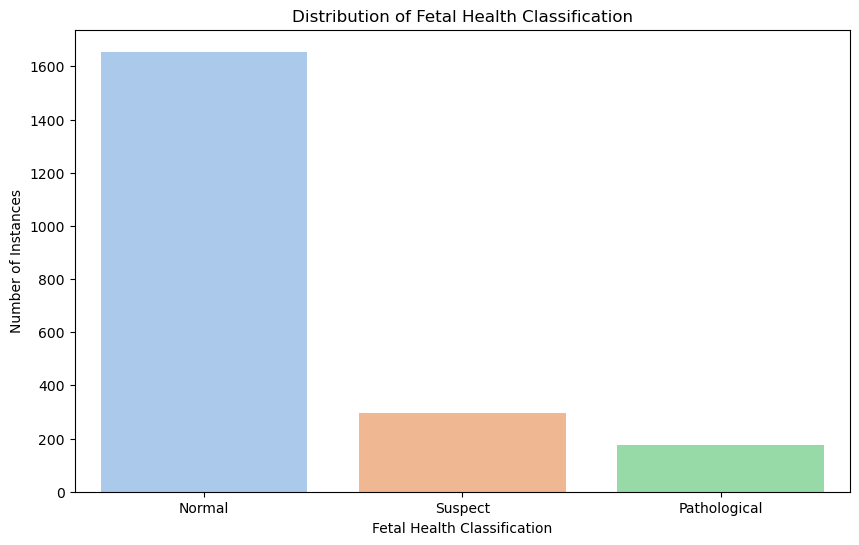

In [4]:
# Visualize the data to discover imbalances
class_counts = df['fetal_health'].value_counts()
class_counts.index = ['Normal', 'Suspect', 'Pathological']

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')
plt.title('Distribution of Fetal Health Classification')
plt.ylabel('Number of Instances')
plt.xlabel('Fetal Health Classification')
plt.show()

#### Fix Dataset Imbalance using SMOTE

There is an imbalances in the number of instances for each classification. Normal has many more instances than both suspect and pathological. We will attempt to remedy this by using SMOTE to balance the classes.

In [5]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64


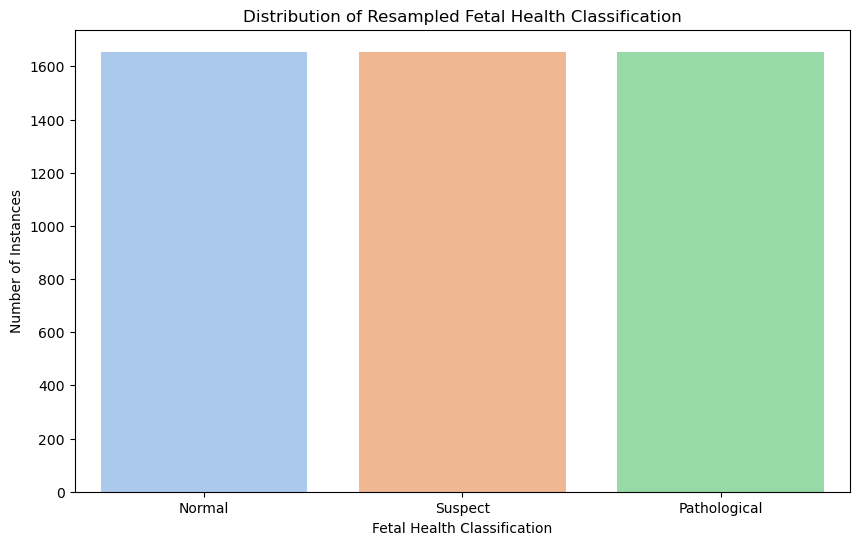

In [7]:
# Visualize new dataset after fixing imbalances
new_y = pd.DataFrame(y_resampled, columns=['fetal_health'])

plt.figure(figsize=(10,6))
sns.countplot(data=new_y, x='fetal_health', order=[1.0, 2.0, 3.0], palette='pastel')
plt.title('Distribution of Resampled Fetal Health Classification')
plt.ylabel('Number of Instances')
plt.xlabel('Fetal Health Classification')
plt.xticks(ticks=[0,1,2], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

Now the data is balanced and we can proceed without worrying about bias. 

In [8]:
print(df.shape)

(2126, 22)


In [9]:
print(df.dtypes)

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [10]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### General Data Analysis

The shape of the data is (2126, 22), which means there are 2126 entries and 22 distinct features. All of the features are type float64, which means they are numerical. Above, you can see a printout of the descriptive statistics. We also included histograms and correlation plots for all features, which are featured below. Although we tried to create clustering plots, the results were difficult to interpret due to the sheer number of them and we decided to exclude them.

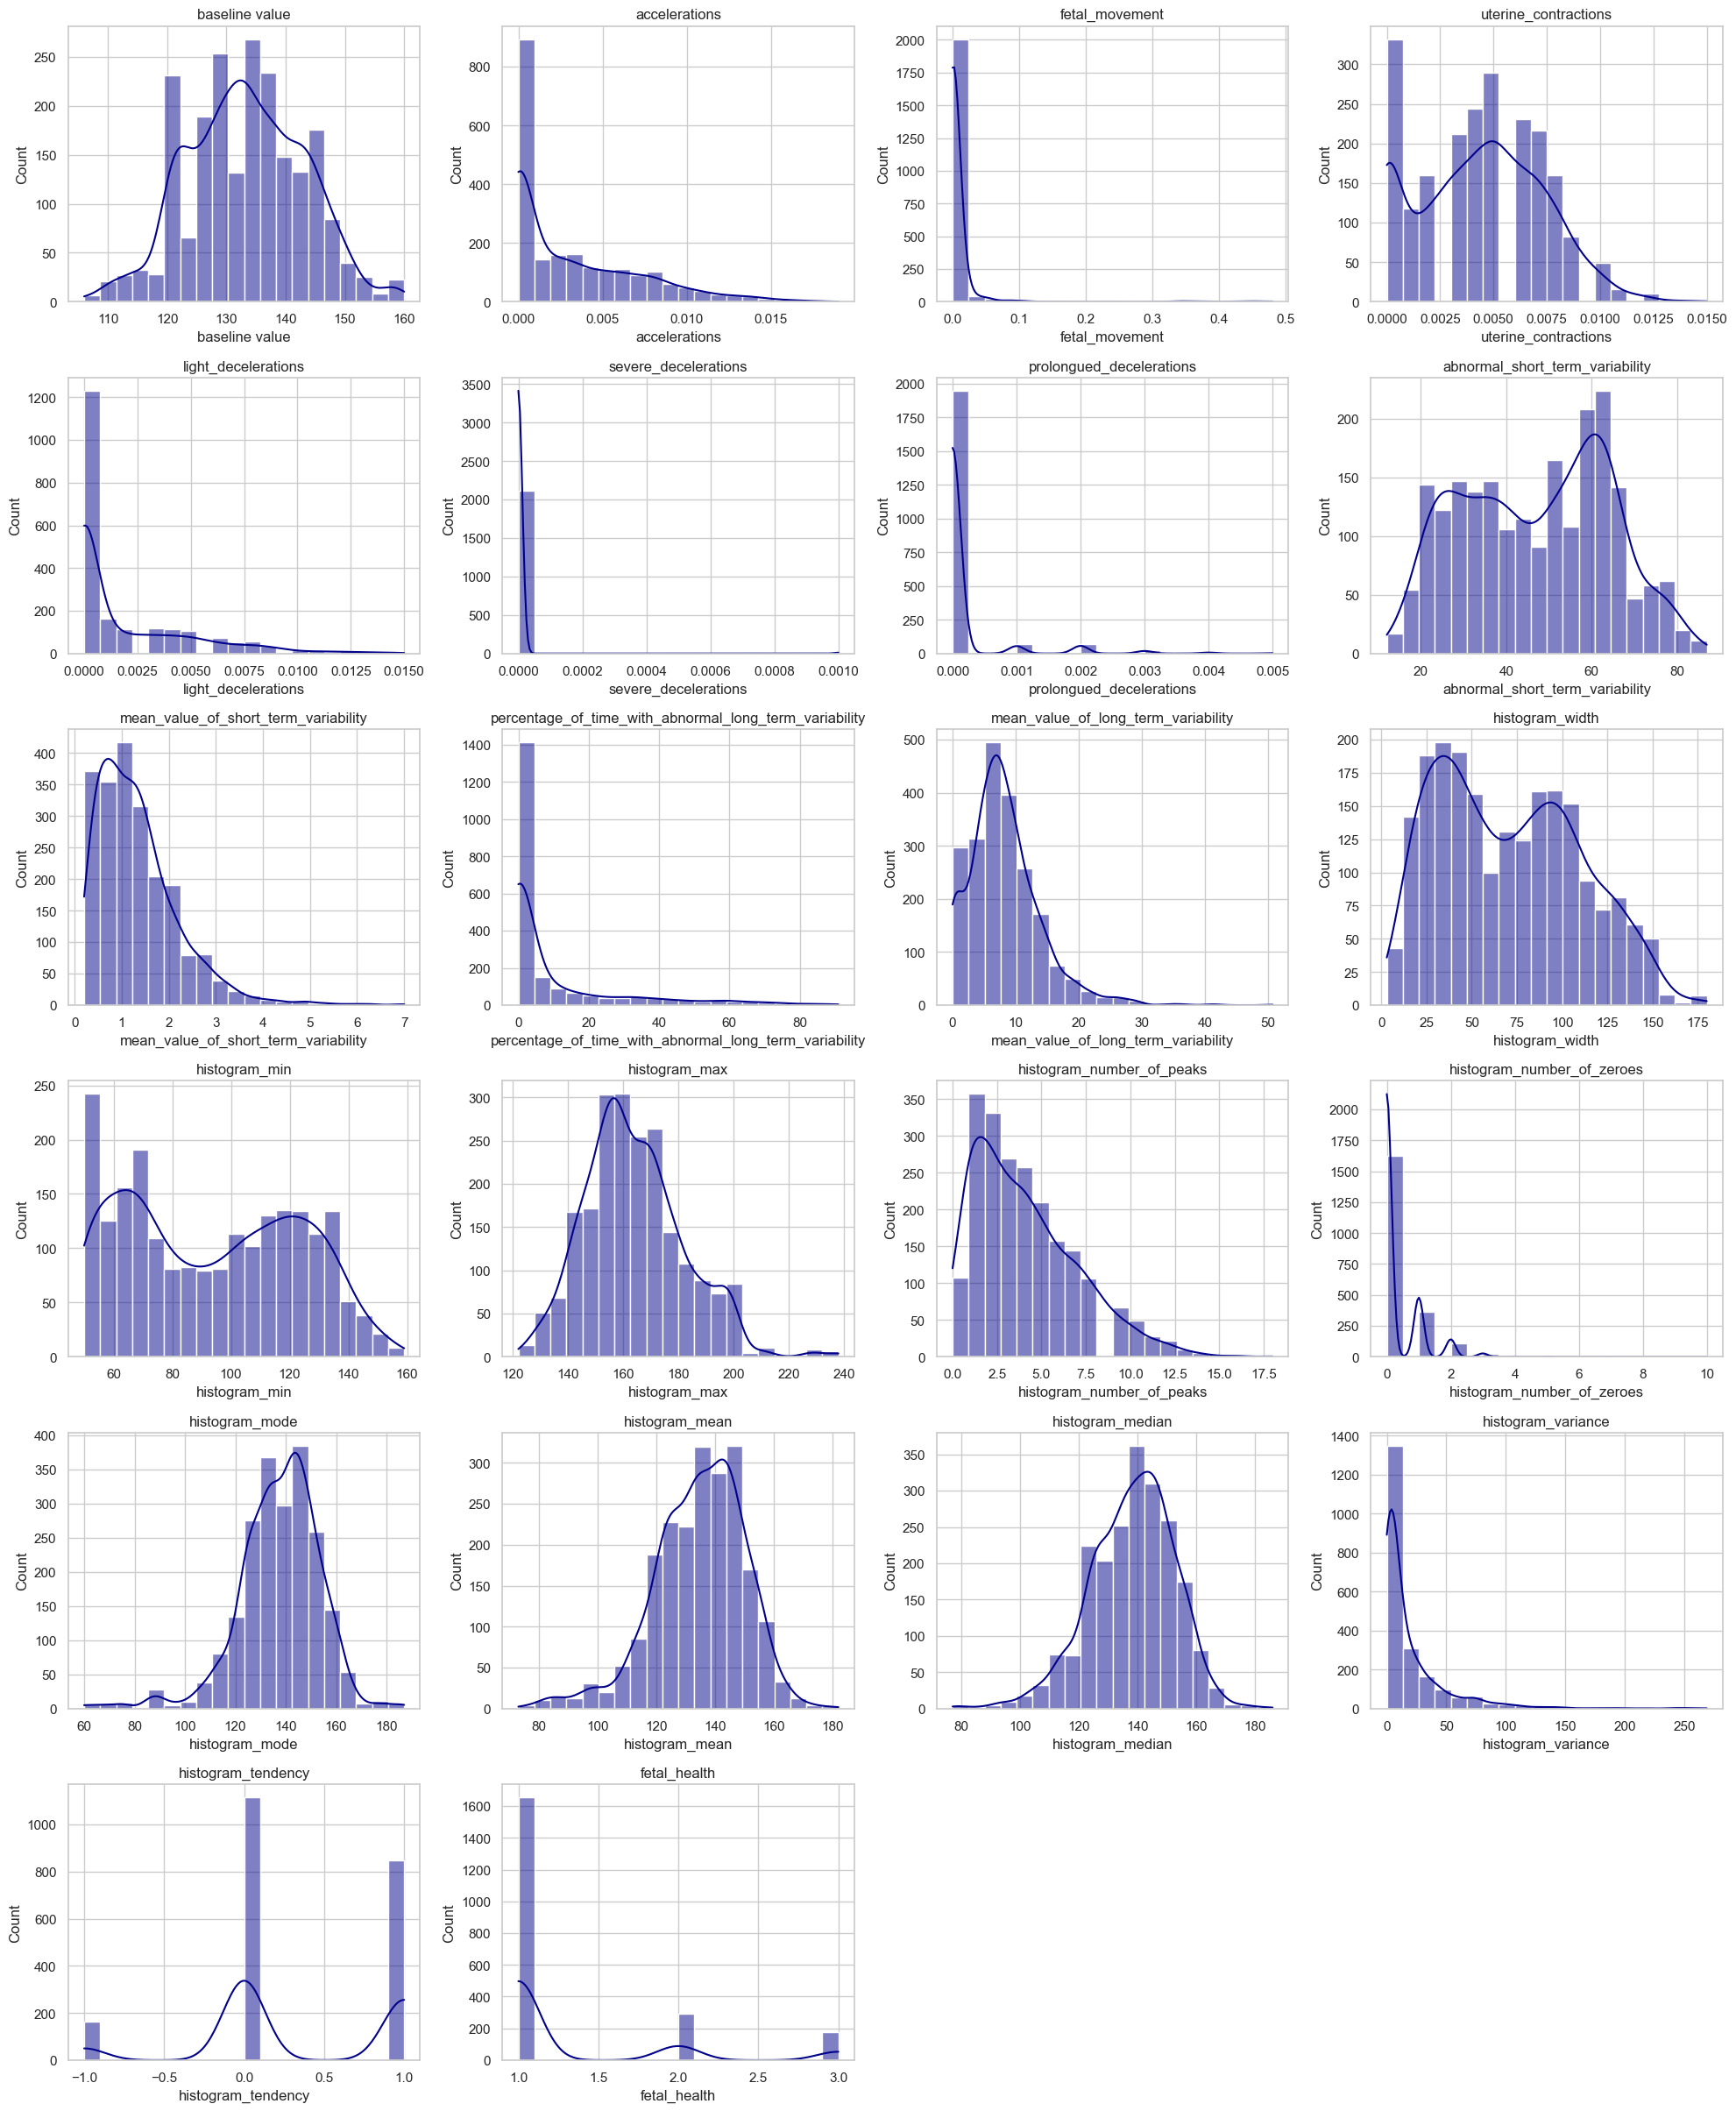

In [11]:
# Visualize each feature as a histogram to evaluation the different distributions

sns.set(style='whitegrid')

num_rows = len(df.columns) - 1 // 4 +1

plt.figure(figsize=(20, num_rows*4))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(df[column], kde=True, bins=20, color='darkblue')
    plt.title(column)

plt.tight_layout()
plt.show()


### Distribution Analysis

The following histograms are normally distributed: baseline value, uterine contraction (and this is slightly right-skewed), histogram max, histogram mode, histogram mean, and histogram median. This suggests the data shown in these graphs are evenly distributed, which makes sense with the features they correspond with. <br/> <br/>
The following histograms are heavily right-skewed: accelerations, fetal movement, light decelerations, severe decelerations, prolonged decelerations, mean value of short-term variability, percentage of time with abnormal long-term variability, mean value of long-term variability, histogram number of zeros, and histogram variance. This suggests that for features such as accelerations and fetal movement, low values are common but there are occurrences of higher values that could be indicative of fetal health. <br/> <br/>
The following histograms are bimodal: abnormal short-term variability, histogram width, and histogram min. This suggests that there are two different “normal” tendencies for these features.


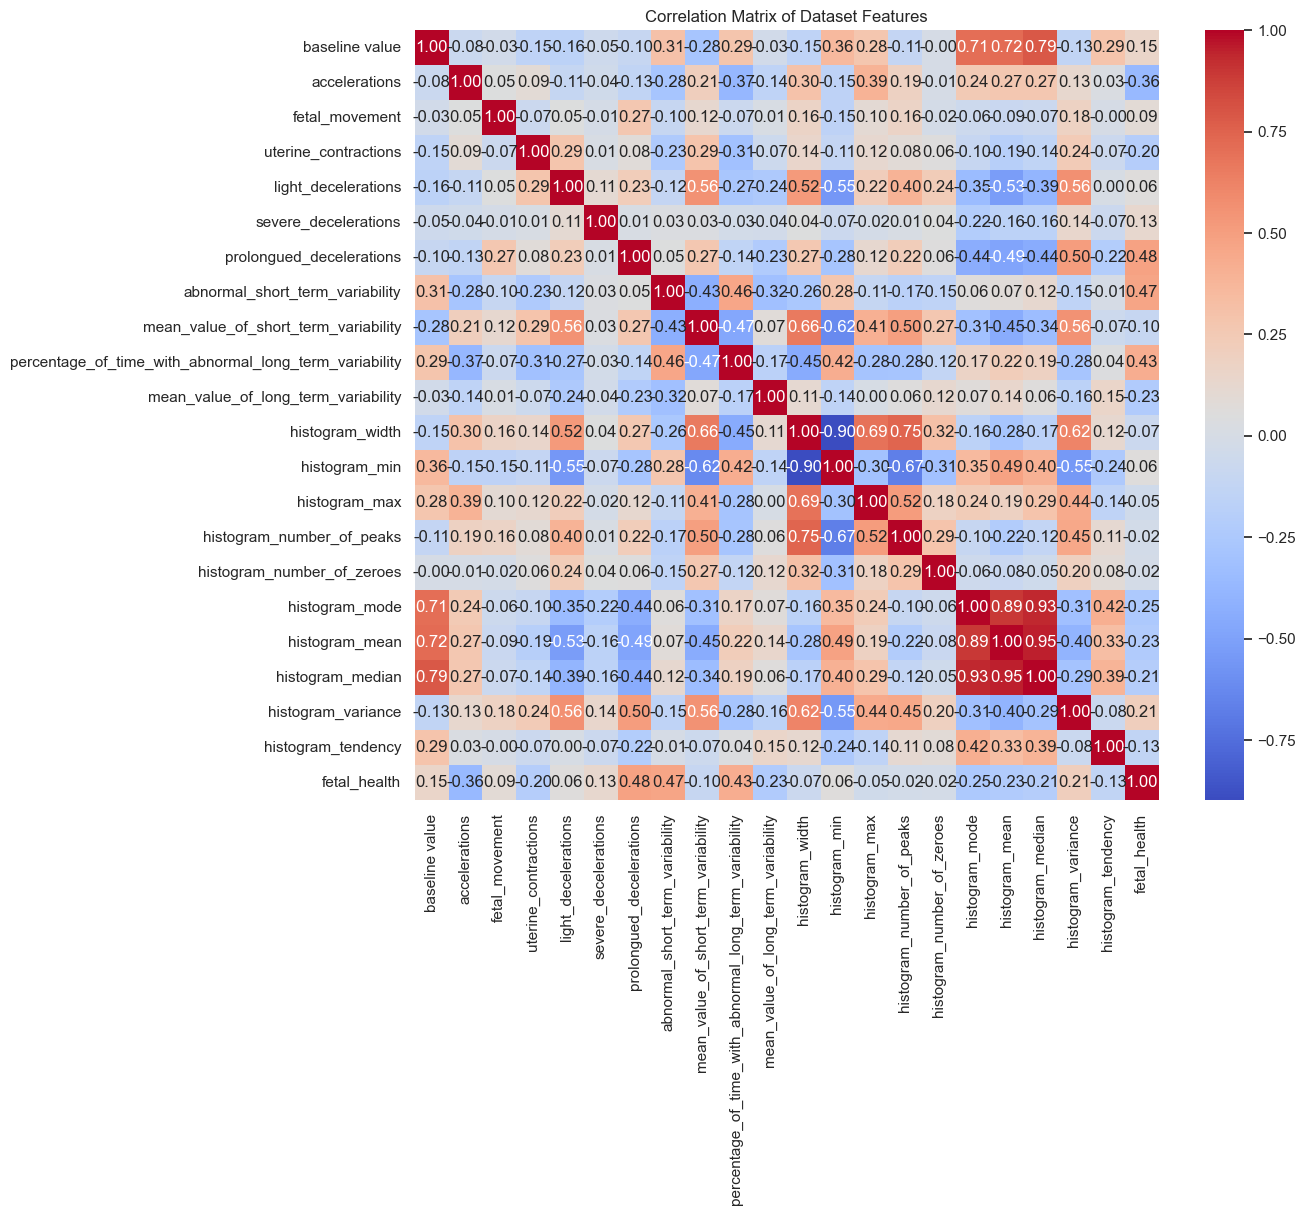

In [12]:
# Visualize correlations between features with a correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Dataset Features')
plt.show()

### Correlation Matrix Analysis

Based on this plot, the features most correlated with fetal health are prolonged decelerations, abnormal short-term variability, and percentage of time with abnormal long-term variability. The features with almost no correlation are the histogram features. Therefore, as we go to implement a model, we will exclude those features.

In [13]:
# Scale the data

scale_X_all = StandardScaler()

columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

X_scaled_all = scale_X_all.fit_transform(df[columns])

X_scaled_df_all = pd.DataFrame(X_scaled_all, columns = columns)
       

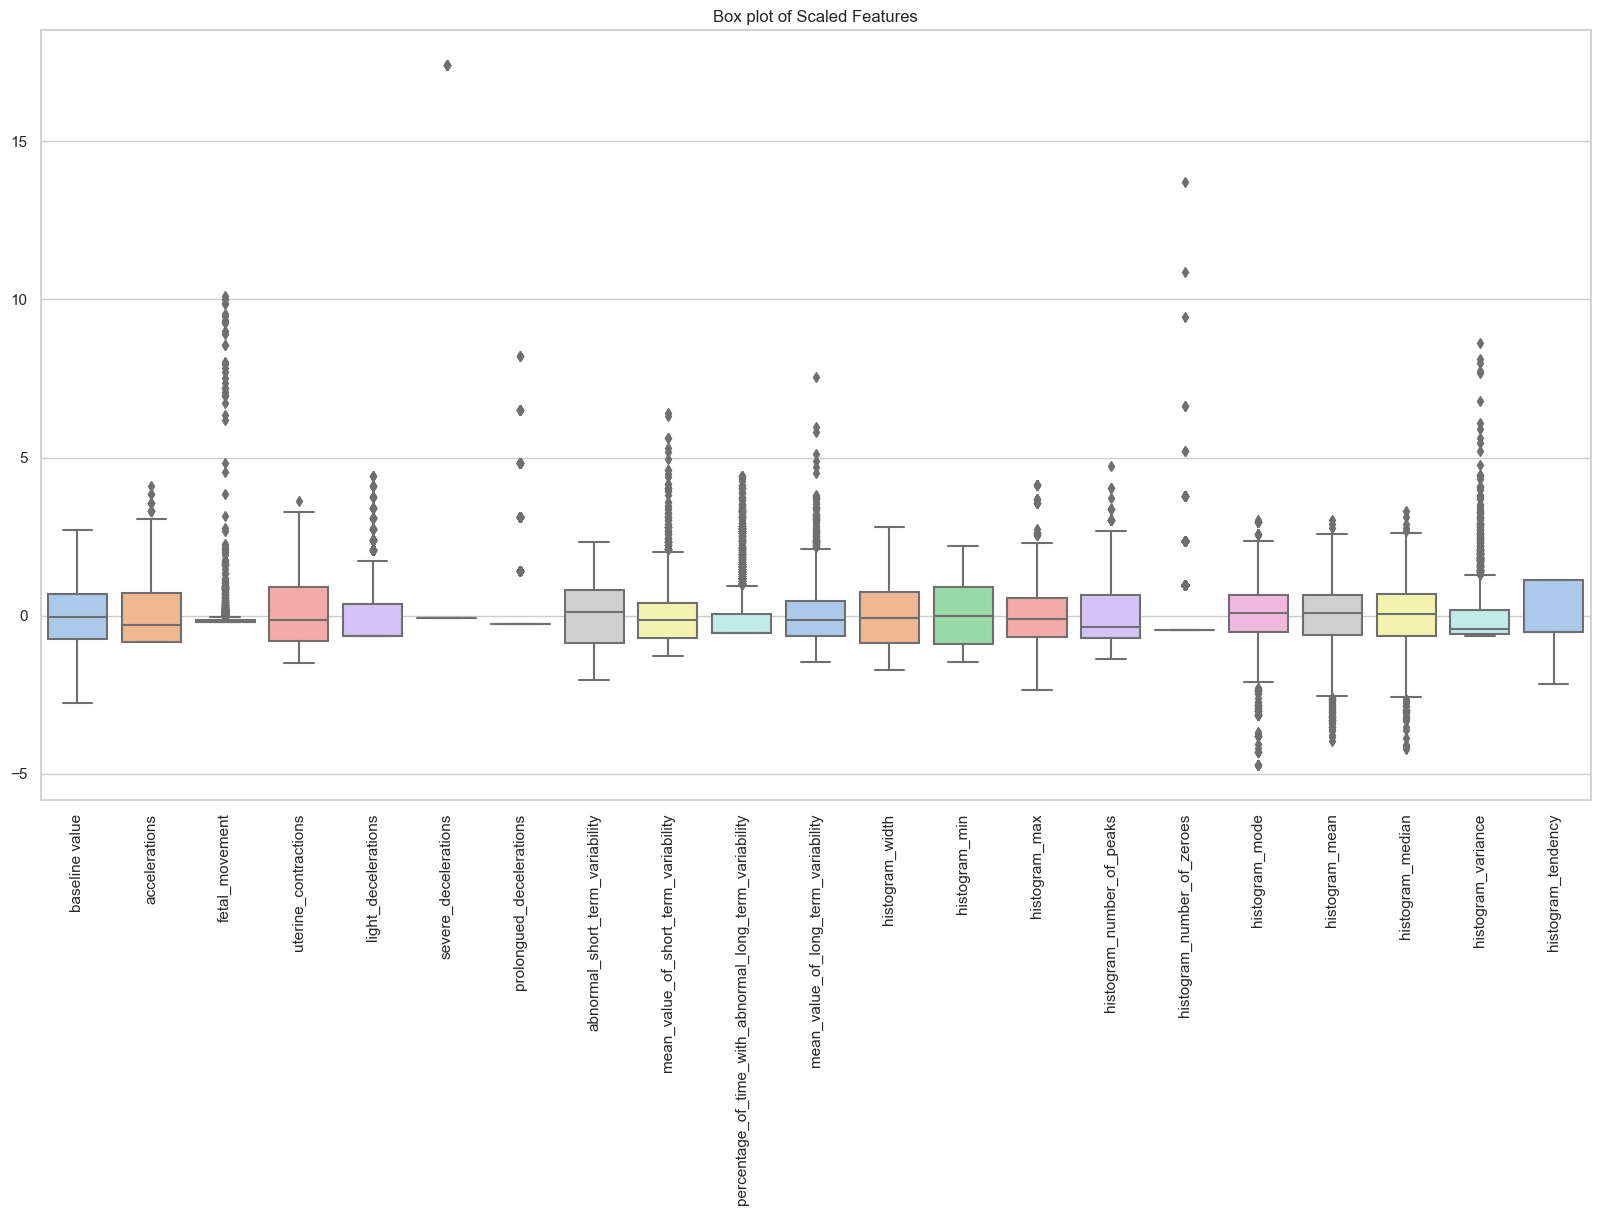

In [14]:
# Box plot of the scaled features

plt.figure(figsize=(20, 10))
sns.boxplot(data=X_scaled_df_all, palette='pastel')
plt.xticks(rotation=90)
plt.title('Box plot of Scaled Features')
plt.show()

In [15]:
# Scale all features except for the histogram ones, because they showed the least amount of correlation with classifications
scale_X = StandardScaler()

columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

X_scaled = scale_X.fit_transform(df[columns])

X_scaled_df = pd.DataFrame(X_scaled, columns = columns)

In [16]:
y = df['fetal_health']

In [17]:
# df_selected = df.loc[:, ~df.columns.str.startswith('histogram_')]
# print(df_selected.head())

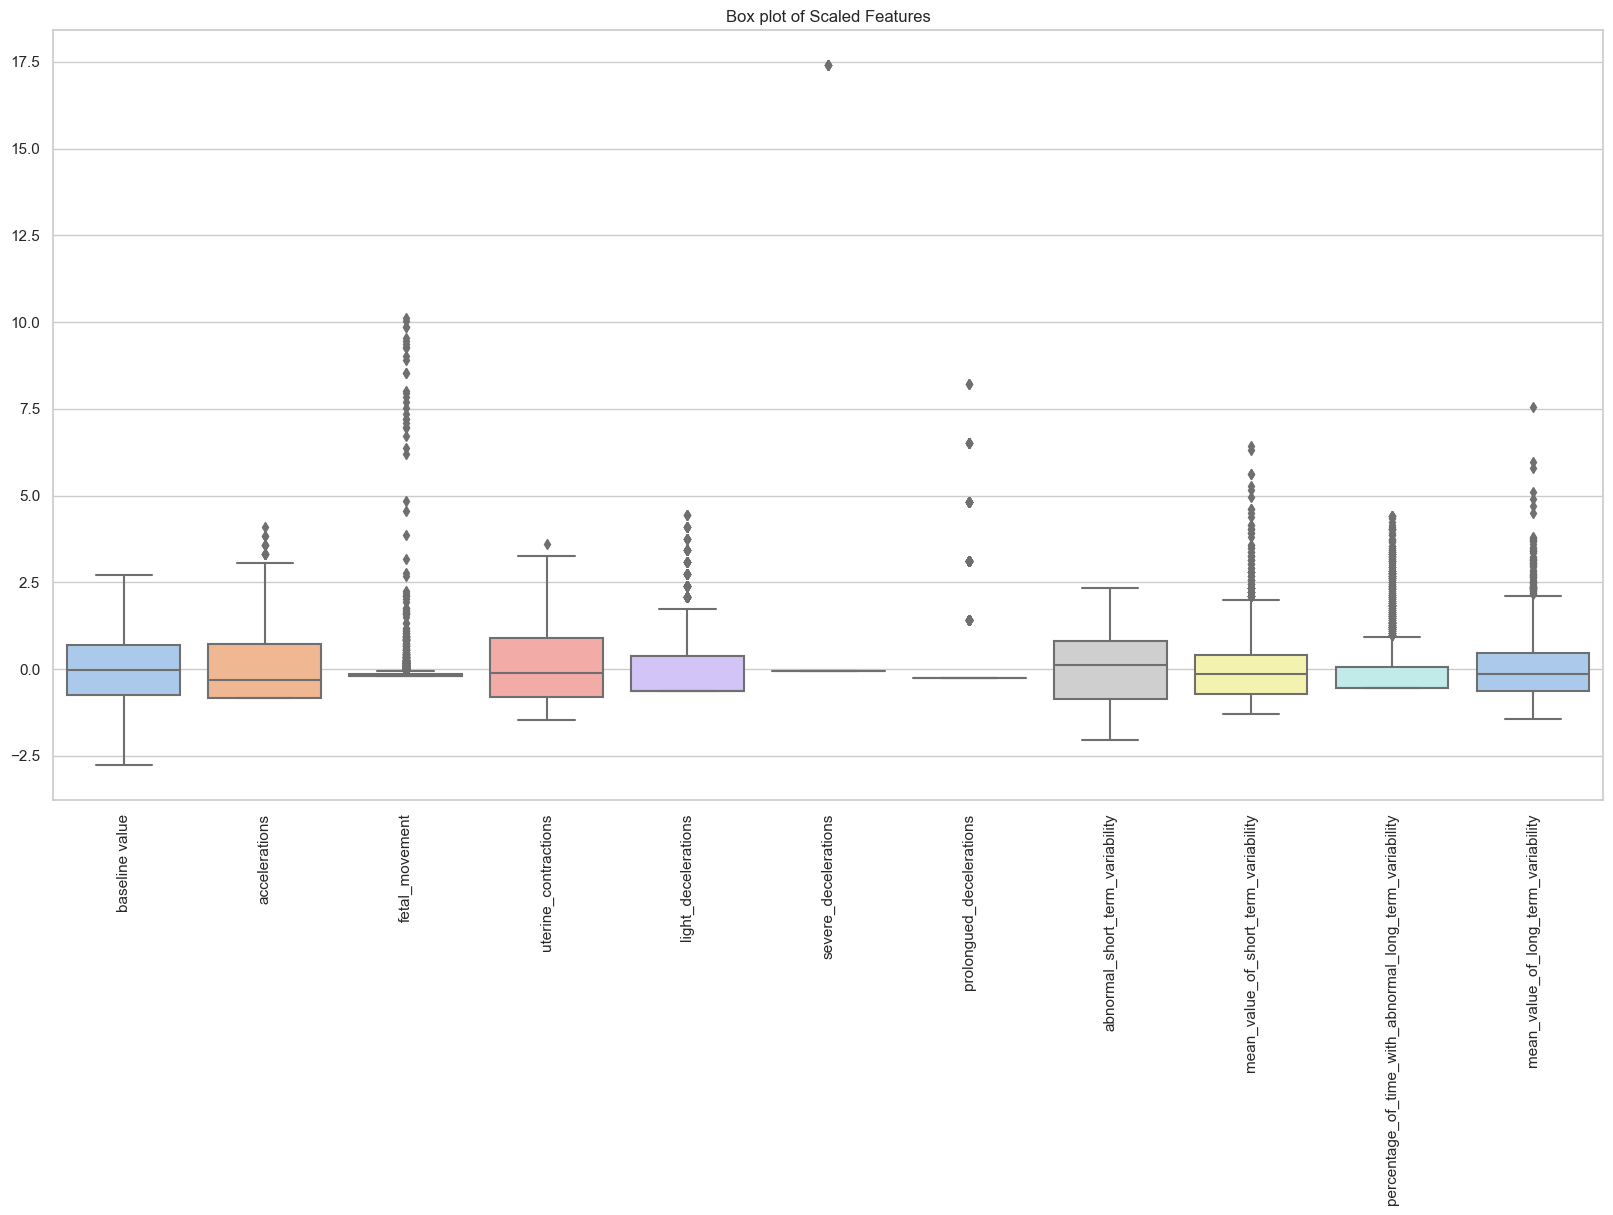

In [18]:
# Box plot of scaled features excluding histogram features

plt.figure(figsize=(20, 10))
sns.boxplot(data=X_scaled_df, palette='pastel')
plt.xticks(rotation=90)
plt.title('Box plot of Scaled Features')
plt.show()

#### A quick note about the box plots and outliers
There are more outliers in abnormal short-term variability and percentage time with abnormal long-term variability but we will leave them.

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.20, random_state=20)

<a id="models"></a>
## Implementing Different Models

Our plan is to try the following models: Logistic Regression, Gradient Boost, Random Forest Classifier, and kNN Classifier. We will evaluate which of these models is the best by cross-validating them. Whichever performs the best, we will proceed with fine-tuning the model to get the most accurate results.

In [20]:
# Build pipelines for different classifiers


# Create dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boost': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

pipelines = {name: Pipeline([(name.lower().replace(' ', '_'), clf)]) for name, clf in classifiers.items()}

# Fit models and store results
model_results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = pipeline.score(X_test, y_test)
    report = classification_report(y_test, predictions, output_dict=True)
    model_results[name] = {'accuracy': accuracy, 'report': report}


for name, results in model_results.items():
    print(f'\nModel: {name}\n')
    print('Classification Report:')
    print(pd.DataFrame(results['report']).transpose())



Model: Logistic Regression

Classification Report:
              precision    recall  f1-score     support
1.0            0.906061  0.955272  0.930016  313.000000
2.0            0.688525  0.583333  0.631579   72.000000
3.0            0.828571  0.707317  0.763158   41.000000
accuracy       0.868545  0.868545  0.868545    0.868545
macro avg      0.807719  0.748641  0.774917  426.000000
weighted avg   0.861836  0.868545  0.863516  426.000000

Model: Gradient Boost

Classification Report:
              precision    recall  f1-score     support
1.0            0.941358  0.974441  0.957614  313.000000
2.0            0.883333  0.736111  0.803030   72.000000
3.0            0.904762  0.926829  0.915663   41.000000
accuracy       0.929577  0.929577  0.929577    0.929577
macro avg      0.909818  0.879127  0.892102  426.000000
weighted avg   0.928029  0.929577  0.927449  426.000000

Model: Random Forest

Classification Report:
              precision    recall  f1-score     support
1.0            

In [21]:
# Determine which model is best by cross-validating them
cv_results_accuracy = []

for name, pipeline in pipelines.items():
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (name, cv_score.mean()))

Logistic Regression: 0.887074 
Gradient Boost: 0.947062 
Random Forest: 0.945893 
KNN: 0.918244 


<a id="bestmodel"></a>
## Best model

Random forest performed the best out of the four models we tried, just narrowly beating out Gradient Boosting Classifier, depending on when you run it. We will proceed with the random forest model. We decided on random forest based on various factors. First, we took a detailed classification report which showed a random forest classifier has the best accuracy. Second, basic cross-validation said that Gradient Boost worked slightly better, but we will rely more heavily on our more detailed report. Random Classifier has the highest overall accuracy and balanced performance across all classes. It also shows strong precision and recall, which is crucial for our medical application where both false positives and false negatives can have significant consequences. We expecially cared about the recall accuracy, as for this medical application, reducing false negatives is of the upmost importance.

#### A quick note on best model
The Gradient Boosting Classifier was actually the better model based on cross-validation results alone. Althoug this is not something to be ignored, the difference was so small and the Random Forest performed better in the detailed classification report, so we decided to proceed with this model instead of the Gradient Boosting Classifier. 

In [22]:
# Create the baseline model with default parameters

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier()

# Fit model on training data
random_forest_model = random_forest.fit(X_train, y_train)

# Print baseline score of Random Forest Classifier on test set
print(f"Baseline Random Forest Classifier Score: {round(random_forest_model.score(X_test, y_test), 2)}")

# Predict using the Random Forest model on the test data
pred_gbcl = random_forest_model.predict(X_test)

Baseline Random Forest Classifier Score: 0.94


In [23]:
# Perform cross-validation
scores_random_forest = cross_val_score(random_forest, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

# Print cross-validation scores and their mean
print(f"CV scores for Random ForestClassifier model:\n{scores_random_forest}")
print(f"CV Mean score: {round(scores_random_forest.mean(), 2)}")

CV scores for Random ForestClassifier model:
[0.94835681 0.9342723  0.92957746 0.93896714 0.9245283  0.9245283
 0.95283019 0.96226415]
CV Mean score: 0.94


### Quick Interpretation
The cross-validation scores for our Random Forest Classifier show promising results for a few reasons. First, and most obviously, The individual fold scores are high, which indicate an accurate model! Second, the range of scores across the 8 folds (0.92 to 0.97) indicate consistent performance across different subsets of our training data. This means our model is not overly sensitive to the data it is trained on which is important for generalization. The mean score of 0.94 just emphasizes what we already know - the model performs well. 

### Improve the best model

We will now use grid search cross validation to improve the random forest classifier

In [24]:
# Build dictionary of list of possible parameter values 

parameters = { 
    'n_estimators': [100, 200, 300, 500, 700], # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None], # Number of features at every split
    'max_depth' : [10, 20, 30, None], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True, False] # Method of selecting samples for training ecah tree
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator = random_forest, param_grid = parameters, cv = 5, n_jobs = -1, verbose = 0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('best Score:', grid_search.best_score_)



Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
best Score: 0.9488235294117647


In [25]:
RF_model = RandomForestClassifier(**grid_search.best_params_)
RF_model.fit(X_train, y_train)

# Testing the Model on test set with best parameters
predictions = RF_model.predict(X_test)
acccuracy = accuracy_score(y_test, predictions)
print('Model Accuracy:', acccuracy)

Model Accuracy: 0.9413145539906104


### Explaining Accuracies
The final model's accuracy is 0.941 (when we ran it for the most recent time, but each previous run was around this value as well), which is about the same as baseline model's accuracy of 0.94 (with a slight, slight improvement). We were a bit diappointed that the fine-tuning did not improve the baseline model by much, but we are happy that our model performs with a 94.13% accuracy at this stage of our project.

### Strengths and Weaknesses
The RF classifier achieved an accuracy of 0.941, which demonstrates its strengths in robustness and reliability, as it performed well across multiple runs (the consistency also points to the model's stability). The minor increse from the baseline model indicates that the classifier is already effectively capturing the underlying patterns in the data. However, minimal improvement does suggest potential areas for refinement. It is possible the model is reaching its performance limit given the data and feature set, in which case the next step would be to try and more complex model, or that further parameter fine-tuning is required. 

<a id="conclusion"></a>
## Answering The Main Questions

#### **How can we effectively use various physiological features to predict and classify the health status of a fetus? <br/>**
The big, overarching question that we answered throughout the steps of our project. To effectively use this dataset to predict and classify the health status of a fetus, you need to collect data, perform EDA, select a model, train portions of the dataset and validate their performance on a separate set, and then interpret the model's output to make clinically relevant classifications. <br/>

#### **Can we develop a predictive model that accurately classifies fetal health?<br/>**
Yes, as we have found, a random forest classifier model can accurately classify fetal health with the right parameter fine-tuning. <br/>
    
#### **Can we confirm which features are the most important to predict fetal health? <br/>**
The features that are most important to predict fetal health are prolonged decelerations, abnormal short-term variability, and percentage of time with abnormal long-term variability. We will briefly explain what each of these features means and their significance.<br/>
1. Prolonged Decelerations: a noticeable decrease in fetal heart rate from the baseline that lasts for an extended period of time, can be around 2 minutes. This can be a sign of fetal distress, and often indicates that the fetus is experiencing hypoxia (lack of oxygen). It can also be caused by umbilical cord compression, maternal hypotension, or uterine hyperstimulation.
2. Abnormal Short-Term Variability: STV of the fetal heart rate refers to the moment-to-moment fluctuations in fetal heart rate when measured over a short time (typicall on scale of seconds). Abnormal STV typically means low fluctuations or overly consistent heart rate patterns. High STV is generally a sign of a healthy, well-oxygenated fetus, whereas low STV can mean the opposite.
3. Percentage of Time with Abnormal Long-Term Variability: LTV refers to the longer-term fluctuations in fetal heart rates, typically measured on a scale of minutes. Abnormal LTV can manifest as either too little variation (flat tracing) or too much variation (wildly fluctuating heart rate). Similar to STV, LTV is important for measuring fetal health. A health fetus usually shows a certain degree of variability in heart rate, reflecting its responsiveness and well-being. How long a fetus goes while having abnormal LTV, whether it is a positive or negative thing, will affect the fetus' health. 

#### **What insights can be drawn from our data and model that could have clinical significance?<br/>**
The insights drawn from our data and model could have several clinically significant implications, and we will briefly explain each one. <br/>
1. Identifying Key Health Indicators: As we mentioned above, we were able to identify the most important features in predicting fetal health. These findings can guide clinicians to priotize certain tests or monitoring parameters.<br/>
2. Delineating Risk: The classifications of this dataset allows doctors to provide more tailored and proactive care based on risk levels ("normal," "suspect," and "pathological"). <br/>
3. Personalized Care Plans: Tied to the benefit above, the model's predictions could inform more personalized care plans, taking into account the unique health profile of each fetus. <br/>
4. Understanding Complex Interactions: The model's ability to analyze how different physiological features interact can shed light on complex biological relationships that are no easily observable in nature. <br/>

#### **Can we utilize the outcomes to improve prenatal care?<br/>**
Yes and no. While our findings demonstrate the possibility of improving prenatal care through advanced data analysis, the practical application of a project developed by two college students will most likely fail to make any sort of meaningful dent. However, the conceptual framework we have developed could serve as a blueprint for more exntensive initiatives. If hospitals could leverage machine learning models in prenatal care, it would be transformative, particularly for women in underserved ares with limited access to quality obsetrics and gynecology services. Such technology could enable remote or automated preliminary assessments, reducing the need for extensive travel to access specialized care. Further, these models could efficiently differentiate between cases that require immedate medical attention and those that do not, which would optimize resource allocation. Ultimately, the implementation of such predictive models in hospitals and clinics around the world could be a major stride forward in enhancing prenatal healthcare. However, realizing this vision requires overcoming substantial logistical, technological, and ethical hurdles. 